In [1]:
%load_ext autoreload 
%autoreload 2

%matplotlib inline

In [2]:
import habitat
import habitat_sim

habitat.__version__, habitat_sim.__version__

pybullet build time: Feb 12 2024 18:02:59


('0.3.0', '0.3.0')

In [3]:
import os
import random
import json
import git

import numpy as np

import habitat_sim
from habitat_sim.gfx import LightPositionModel

from src.lights import change_lights
from src.main import generate_scenario, run_scenario

from utils.settings import load_sim_settings, load_light_settings
from utils.visual import display_sample
from utils.common import do_test_steps, create_simulator, get_camera_matrix

repo = git.Repo(".", search_parent_directories=True)
dir_path = repo.working_tree_dir
data_path = os.path.join(dir_path, "data")
print(f"data_path = {data_path}")

data_path = /home/remote/ws/job/be2rlab/OpenSemanticMapping/data


In [4]:
DEBUG = False

depth_scale = 6553.5
nav_points_count = 1
dataset_name = 'hm3d_minival'
# dataset_name = 'test_scenes'

In [5]:
sim_settings, scene_name = load_sim_settings('configs/sim_settings.json', data_path, dataset=dataset_name, scene_name='00808-y9hTuugGdiq')
light_settings = load_light_settings('configs/light_settings.json')

In [6]:
# sim_settings['scene_name'] = '00800-TEEsavR23oF'

In [7]:
def get_output_paths(dir_path, dataset_name, scene_name):
    output_path = os.path.join(
        dir_path, 
        "be2r-habitat-data-generator/generated/",
        dataset_name,
        scene_name
    )

    if not os.path.exists(output_path):
        os.makedirs(output_path)

    image_output_path = os.path.join(output_path, 'results/')

    if not os.path.exists(image_output_path):
        os.makedirs(image_output_path)

    return output_path, image_output_path

In [8]:
output_path, image_output_path = get_output_paths(dir_path, dataset_name, scene_name)

In [9]:
try:
    sim.close()
except NameError:
    pass

sim = create_simulator(sim_settings)

Renderer: NVIDIA GeForce GTX 1050 Ti/PCIe/SSE2 by NVIDIA Corporation
OpenGL version: 4.6.0 NVIDIA 545.23.08
Using optional features:
    GL_ARB_vertex_array_object
    GL_ARB_separate_shader_objects
    GL_ARB_robustness
    GL_ARB_texture_storage
    GL_ARB_texture_view
    GL_ARB_framebuffer_no_attachments
    GL_ARB_invalidate_subdata
    GL_ARB_texture_storage_multisample
    GL_ARB_multi_bind
    GL_ARB_direct_state_access
    GL_ARB_get_texture_sub_image
    GL_ARB_texture_filter_anisotropic
    GL_KHR_debug
    GL_KHR_parallel_shader_compile
    GL_NV_depth_buffer_float
Using driver workarounds:
    no-forward-compatible-core-context
    nv-egl-incorrect-gl11-function-pointers
    no-layout-qualifiers-on-old-glsl
    nv-zero-context-profile-mask
    nv-implementation-color-read-format-dsa-broken
    nv-cubemap-inconsistent-compressed-image-size
    nv-cubemap-broken-full-compressed-image-query
    nv-compressed-block-size-in-bits


[00:29:36:760639]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Scene Instance> : No Glob path result found for `/home/remote/ws/job/be2rlab/OpenSemanticMapping/data/scene_datasets/hm3d_v0.2/minival/00800-TEEsavR23oF/*.basis.scene_instance.json` so unable to load templates from that path.
[00:29:36:760682]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Scene Instance> : No Glob path result found for `/home/remote/ws/job/be2rlab/OpenSemanticMapping/data/scene_datasets/hm3d_v0.2/minival/00802-wcojb4TFT35/*.basis.scene_instance.json` so unable to load templates from that path.
[00:29:36:760703]:[Warning]:[Metadata] AttributesManagerBase.h(398)::buildAttrSrcPathsFromJSONAndLoad : <Scene Instance> : No Glob path result found for `/home/remote/ws/job/be2rlab/OpenSemanticMapping/data/scene_datasets/hm3d_v0.2/minival/00803-k1cupFYWXJ6/*.basis.scene_instance.json` so unable to load templates from that path.
[00:29:

NavMesh area = 154.1698760986328
Bounds =  [-12.666964   -3.1386094  -3.744133 ] [9.793893 7.807398 6.070597]
Random navigable points :  [-8.966763    0.06139064  2.0924044 ]
Are points navigable? True
Start point : [ 5.603629  -2.7386093  4.2908726]


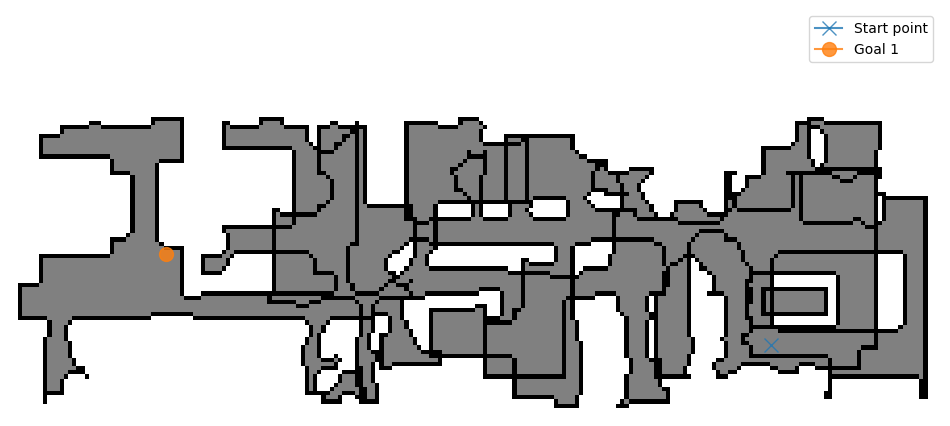

In [10]:
start_point, navigatable_points = generate_scenario(sim, nav_points_count, sim_settings)

In [11]:
def place_agent(sim, sim_settings, start_point):
    agent_state = habitat_sim.AgentState()
    agent_state.position = start_point
    # agent_state.rotation = np.normalized(np.quaternion(1, 0, 0, 0))
    sim.initialize_agent(sim_settings["default_agent"], agent_state)

    return sim

In [12]:
sim = place_agent(sim, sim_settings, start_point)

In [13]:
if DEBUG:
    sim = change_lights(sim, sim_settings, light_settings, 0)
    do_test_steps(sim, sim_settings, max_frames=5)

In [14]:
trajectory = run_scenario(sim, sim_settings, light_settings, start_point, navigatable_points, depth_scale, image_output_path)

100%|██████████| 1/1 [00:00<00:00, 37.11it/s]

{'vector': [0.0, 0.0, 0.0, 1.0], 'color': [10.0, 0.0, 0.0], 'model': 'camera'}
--------------------
Path exception: . Skip goal.
--------------------


In [15]:
np.savetxt(os.path.join(output_path, "traj.txt"), np.array(trajectory), newline="\n")

In [16]:
K = get_camera_matrix(sim.agents[sim_settings['default_agent']])

In [17]:
print(f"camera_matrix = \n{K}\n\ndepth_scale = {depth_scale}")

camera_matrix = 
[[540.    0.  539.5]
 [  0.  480.  479.5]
 [  0.    0.    1. ]]

depth_scale = 6553.5


In [18]:
!rm generated.zip
!zip -r generated.zip generated/mp3d_example/

  adding: generated/mp3d_example/ (stored 0%)
  adding: generated/mp3d_example/17DRP5sb8fy/ (stored 0%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/ (stored 0%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/frame000185.jpg (deflated 13%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/depth000369.png (deflated 0%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/frame000016.jpg (deflated 8%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/depth000120.png (deflated 1%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/depth000362.png (deflated 0%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/frame000593.jpg (deflated 2%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/depth000112.png (deflated 2%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/frame000352.jpg (deflated 6%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/frame000557.jpg (deflated 4%)
  adding: generated/mp3d_example/17DRP5sb8fy/results/depth000164.png (deflated 0%)